# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import fnmatch
import locale
# RGE: what is this doing?
locale.setlocale(locale.LC_ALL,"") 

import matplotlib.pyplot as plt

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: c:\Users\Roger\Desktop\WI22\applied_data_science\week_2\Material für die Übungen-20230228\Data_Collection_via_WebAPI\CoinGecko_WebAPI


## Get data

In [2]:
# Simple price endpoint with the required parameters
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 22430}}

In [10]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin', 'Banano'], vs_currencies='usd')

{'banano': {'usd': 0.00481018},
 'bitcoin': {'usd': 22405},
 'dogecoin': {'usd': 0.074075},
 'ethereum': {'usd': 1564.79},
 'near': {'usd': 2.02}}

In [11]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin', 'Banano'], vs_currencies=['usd', 'eur'])

{'banano': {'usd': 0.0048103, 'eur': 0.00452547},
 'bitcoin': {'usd': 22404, 'eur': 21078},
 'dogecoin': {'usd': 0.074113, 'eur': 0.069724},
 'ethereum': {'usd': 1565.01, 'eur': 1471.87},
 'near': {'usd': 2.02, 'eur': 1.9}}

In [14]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin, Banano', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'banano': {'usd': 0.00480998,
  'usd_market_cap': 7052540.232691395,
  'usd_24h_vol': 21804.352400499018,
  'usd_24h_change': -2.342820764890243,
  'last_updated_at': 1678096951},
 'bitcoin': {'usd': 22403,
  'usd_market_cap': 432588634120.2254,
  'usd_24h_vol': 16799365807.759172,
  'usd_24h_change': 0.014252141527744695,
  'last_updated_at': 1678096962},
 'dogecoin': {'usd': 0.074117,
  'usd_market_cap': 10257699640.740084,
  'usd_24h_vol': 305972175.8984438,
  'usd_24h_change': -2.3323333200011573,
  'last_updated_at': 1678096975},
 'ethereum': {'usd': 1565.28,
  'usd_market_cap': 188575364272.00006,
  'usd_24h_vol': 5982018717.123985,
  'usd_24h_change': -0.27378179934692126,
  'last_updated_at': 1678096972},
 'near': {'usd': 2.02,
  'usd_market_cap': 1744607347.9497933,
  'usd_24h_vol': 82955485.99531268,
  'usd_24h_change': -2.67268384810885,
  'last_updated_at': 1678096968}}

In [15]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['banano', 'bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
banano
0.00480998


## Extract and plot data

In [16]:
# Keys from dictionary
names = list(data.keys())
print(names)
  
# Get values from dictionary   
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    values.append(vals)
print(values)

['banano', 'bitcoin', 'dogecoin', 'ethereum', 'near']
[0.00480998, 22403, 0.074117, 1565.28, 2.02]


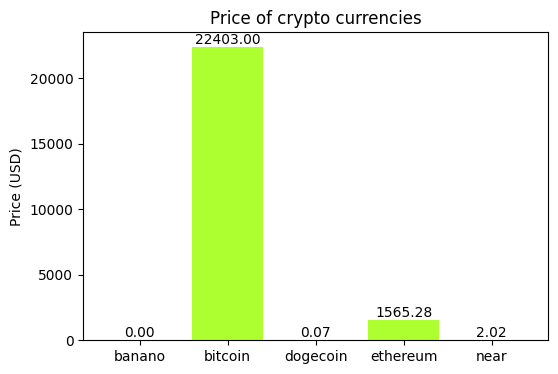

In [18]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4))

bar_x          = [1,2,3,4,5]
bar_height     = values
bar_tick_label = names
bar_label      = ["%.2f" % i for i in values]

bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label,color='greenyellow')
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)
plt.ylabel('Price (USD)')
plt.title('Price of crypto currencies')

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [19]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-03-06 11:04:37
Python Version: 3.10.9
-----------------------------------
